In [1]:
import numpy as np

import matplotlib.pyplot as plt
import importlib

import findatree.io as io
import findatree.visualize as visual
import findatree.segmentation as segment
import findatree.object_properties as obj_props

plt.style.use(r"C:\Repos\findatree\own.mplstyle")

### Load rasters and reproject to normalized channels

In [7]:
importlib.reload(io)

path_plot = r'C:\Users\flori\Documents\lwf\plots\220512_flashtalk'

dir_names=[]
dir_names.extend([r'C:\Data\lwf\DSM_2021'])
dir_names.extend([r'C:\Data\lwf\DTM'])
dir_names.extend([r'C:\Data\lwf\Orthophotos_2021'])

params_cs = {
    'tnr': 11878,
    # 'px_width_reproject': 0.2,
    # 'downscale': 0,
}

cs, params_cs = io.load_channels(dir_names, params_cs)

-----------
Parameters:
  date_time                     : 220615-175856
  tnr                           : 11878
  path_dsm                      : C:\Data\lwf\DSM_2021\Tnr_11878_D-20210713_DSM.tif
  path_dtm                      : C:\Data\lwf\DTM\tnr_11878_dtm.tif
  path_ortho                    : C:\Data\lwf\Orthophotos_2021\Tnr_11878_D-20210713_Ortho.tif
  crs                           : EPSG:25832
  px_width_reproject            : 0.2
  downscale                     : 0
  px_width                      : 0.2
  shape                         : (840, 804)
  affine                        : [[ 2.00000000e-01  0.00000000e+00  6.58459047e+05]
 [ 0.00000000e+00 -2.00000000e-01  5.45850800e+06]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Segmentation -> Objects
#### (1) Segmentation
1. Local gaussian thresholding -> mask
2. Marker based watershed with markers generated by local peaks in distance transformation of mask

In [17]:
importlib.reload(segment)

params_segment = {
    # 'thresh_downscale':1,
    # 'water_downscale':0,
}

cs_segment, params_segment = segment.main(
    cs,
    params_cs,
    params_segment,
)

    ... [io.channels_primary_to_secondary()] already secondary channels!
    ... [io.channels_primary_to_secondary()] already secondary channels!
    ... [segmentation.local_thresholding()] Gaussian thresholding kernel width: 30.0 [m] = 9 [px]
    ... [segmentation.watershed_by_peaks_in_disttrafo()] Removing holes of area: 0.00 [m**2] = 0 [px]
    ... [segmentation.watershed_by_peaks_in_disttrafo()] Local peaks min. distance: 1.20 [m] = 1 [px]
    ... [segmentation.watershed_by_peaks_in_disttrafo()] Removing labels of area: 0.20 [m**2] = 0 [px]
-----------
Parameters:
  thresh_global_chm             : 3
  thresh_global_ndvi            : 0.4
  thresh_channel                : l
  thresh_downscale              : 1
  thresh_blur                   : False
  thresh_width                  : 30
  water_channel                 : l
  water_downscale               : 0
  water_peak_dist               : 1.2
  water_hole_min_area           : 0.0
  water_label_min_area          : 0.2
  thresh_shape  

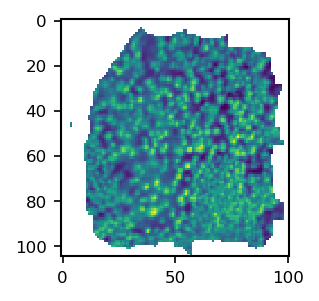

#### (2) Plot segmentation results

TypeError: unhashable type: 'numpy.ndarray'

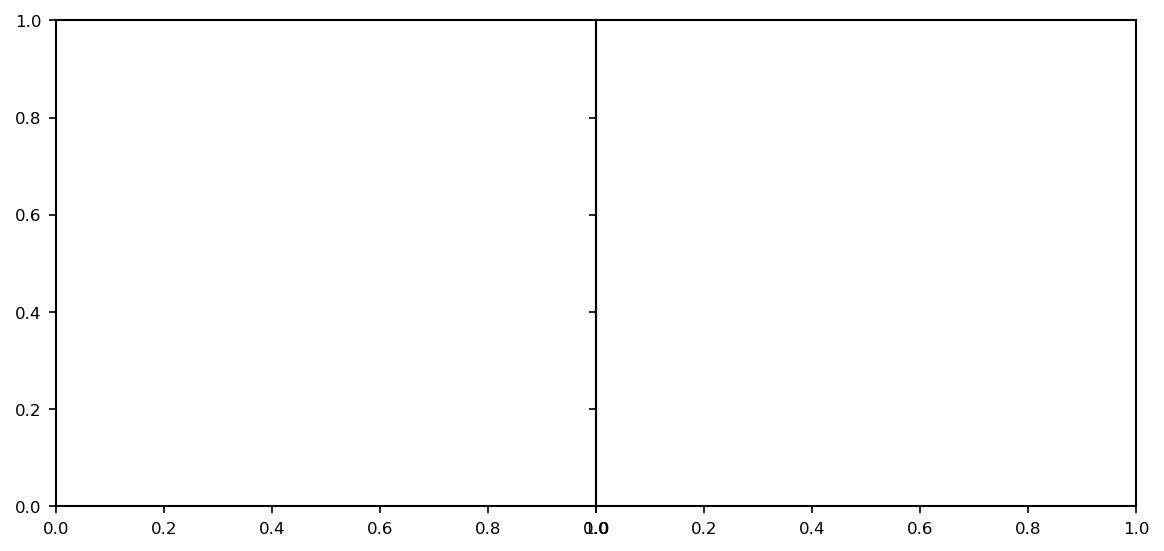

In [23]:
importlib.reload(visual)

channels = [
    cs['RGB'],
    cs['RGB'],
]
channels_names = [
    'RGB',
    'RGB + Object boundaries',
]
contrasts = [
    (0.,0.),
    (0.,0.),
]
use_random_cmap = [False, False]
show_bounds = [False, True]

# ROI
width = 200
x_center = 500
y_center = 500
xylim = [(x_center, width), (y_center, width)]

f, axs = visual.show_channels(
    channels,
    # xylim=xylim,
    # mask=cs_segment['mask_global'],
    # bounds=cs_segment['bounds'],
    # show_bounds=show_bounds,
    contrasts=contrasts,
    # channel_names=channels_names,
    # use_random_cmap=use_random_cmap,
    zoom=1.2,
    n_cols_rows=(2,1),
)

### Object properties
#### (1) Extract object properties

In [7]:
# importlib.reload(obj_props)
# props, names = obj_props.labels_to_props_all(cs_segment['labels'], cs, params_cs, include_labels=None)

In [8]:
# # print(names)

# xlim = [5e-3, 1]

# # Filter
# name = 'perc75_chm'
# positives = props[:, names.index(name)]
# positives = positives > 5

# select = [
#     'perc75_blue',
#     'perc75_green',
#     'perc75_red',
#     'perc75_re',
#     'perc75_nir',
#     ]

# # select = [
# #     'mean_upperl_blue',
# #     'mean_upperl_green',
# #     'mean_upperl_red',
# #     'mean_upperl_re',
# #     'mean_upperl_nir',
# #     ]

# # bins = np.linspace(0.5,1,70)
# bins= 50


# f, ax = plt.subplots(figsize=[4,3])
# for name in select:
#     _ = ax.hist(
#         props[:, names.index(name)][positives],
#         bins=bins,
#         histtype='step',
#         label=name,
#         )

# _ = ax.legend(loc='upper left',bbox_to_anchor=(1,1))
# # ax.set_xlim(xlim)
# # ax.set_xscale('log')

In [9]:
# # print(names)

# # Filter
# name = 'perc75_chm'
# positives = props[:, names.index(name)]
# positives = positives > 5

# # Variables
# name1 = 'std_ndre'
# feature1 = props[:, names.index(name1)]

# name2 = 'perc75_chm'
# feature2 = props[:, names.index(name2)]

# name3 = 'perc75_s'
# feature3 = props[:, names.index(name3)]

# x = feature1[positives]
# y = feature2[positives]
# z = feature3[positives]

# f, ax = plt.subplots(figsize=[4,3])
# _ = ax.scatter(
#     x,
#     y,
#     # c=z,
#     color='k',
#     s=5,
#     alpha=0.5,
#     )

# ax.set_xlabel(name1)
# ax.set_ylabel(name2)